pappus points:
1/3 2/3
5/3 4/3
3/5 4/5
   collinear:  True


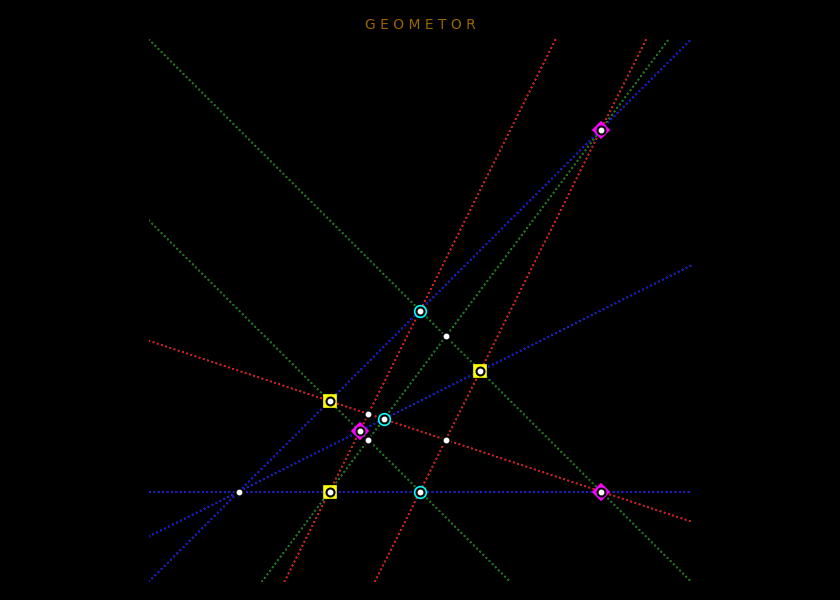

In [1]:
%run run.py
%matplotlib widget

blues = []
reds = []
greens = []

squares = []
circles = []
diamonds = []

pappus_points = []

A1 = point(0, 0)
squares.append(A1)
add_point(A1)

A2 = point(1, 0)
circles.append(A2)
add_point(A2)

line_a = line(A1, A2)
add_element(line_a)
blues.append(line_a)

# manually set for now
# A3 = point(sp.Rational(4, 2), 0)
A3 = point(3, 0)
diamonds.append(A3)
add_point(A3)


B1 = point(0, 1)
squares.append(B1)
add_point(B1)

B2 = point(1, 2)
circles.append(B2)
add_point(B2)

line_b = line(B1, B2)
blues.append(line_b)
add_element(line_b)

#TODO: set point by function
B3 = point(3, 4)
diamonds.append(B3)
add_point(B3)


j1 = line(A1, B2)
reds.append(j1)
j2 = line(A2, B1)
greens.append(j2)
add_element(j1)
add_element(j2)
meet = j1.intersection(j2)
pt = pts[pts.index(meet[0])]
diamonds.append(pt)
pappus_points.append(pt)

j1 = line(A2, B3)
reds.append(j1)
j2 = line(A3, B2)
greens.append(j2)
add_element(j1)
add_element(j2)
meet = j1.intersection(j2)
pt = pts[pts.index(meet[0])]
squares.append(pt)
pappus_points.append(pt)

j1 = line(A1, B3)
greens.append(j1)
j2 = line(A3, B1)
reds.append(j2)
add_element(j1)
add_element(j2)
meet = j1.intersection(j2)
pt = pts[pts.index(meet[0])]
circles.append(pt)
pappus_points.append(pt)

pappus_line = line(pappus_points[0], pappus_points[1])
blues.append(pappus_line)
add_element(pappus_line)


limx, limy = get_limits_from_points(pts)
bounds = set_bounds(limx, limy)

plt_init(limx, limy)

# plot_elements(elements, bounds)
for line in blues:
    plot_line(line, bounds, color='b', linestyle=':')
    
for line in reds:
    plot_line(line, bounds, color='r', linestyle=':')
    
for line in greens:
    plot_line(line, bounds, color='g', linestyle=':')
    
plot_points(circles, under_color='#0FF', under_markersize=7, under_marker='o', add_to_cursors=False)
plot_points(squares, under_color='#FF0', under_markersize=7, under_marker='s', add_to_cursors=False)
plot_points(diamonds, under_color='#F0F', under_markersize=7, under_marker='D', add_to_cursors=False)
plot_points(pts)

print(f'pappus points:')
for pt in pappus_points:
    print(pt.x, pt.y)
    
print('   collinear: ', sp.Point.is_collinear(*pappus_points))



In [2]:
triangle_sq = polygon(squares)
plot_polygon(triangle_sq, color='#FF03')

triangle_cir = polygon(circles)
plot_polygon(triangle_cir, color='#0FF3')

triangle_dia = polygon(diamonds)
plot_polygon(triangle_dia, color='#F0F3')

In [3]:
print('points: ', len(pts))
for pt in pts:
    print(f'{str(pt.x): >8} {str(pt.y): >8}')

points:  14
       0        0
       1        0
       3        0
       0        1
       1        2
      -1        0
       3        4
     1/3      2/3
     5/3      4/3
     3/7      4/7
     9/7     12/7
     3/7      6/7
     9/7      4/7
     3/5      4/5


In [4]:
def spread(l1, l2):
    '''calculate the spread '''
    a1, a2, a3 = l1.coefficients
    b1, b2, b3 = l2.coefficients

    spread = ((a1*b2 - a2*b1) ** 2) / ( (a1 ** 2 + b1 ** 2) * (a2 ** 2 + b2 ** 2) )
    return spread

In [5]:
sp1 = spread(line_a, pappus_line)
if not math.isnan(sp1):
    print(sp1)


9/25


In [6]:
pappus_line.coefficients

In [7]:
line_b.equation().as_expr().subs(x, 5)

In [8]:
eq1 = sp.Eq(line_b.equation().expand(), 0)
# eq1 = sp.Expr(line_b.equation())
eq1 - sp.Expr(line_b.equation().as_expr())

TypeError: unsupported operand type(s) for -: 'Equality' and 'Expr'

In [ ]:
# eq2 = sp.Eq(-x + y - 1, 0)
eq1 = x - 5
eq2 = -x + y - 1
# eq2 = line_b.equation()
# eq2
sp.solve([eq1, eq2])

In [ ]:
l1 = line(A1, A2)
l1.equation()

In [ ]:
sp.solve([eq1, eq2], y)

In [ ]:
sp.solve(line_b.equation(), eq)

In [ ]:
line_b.intersection(sp.Line(sp.Eq(x + 0 * y - 5)))

In [ ]:
sp.Eq(x, 5)

In [ ]:
cpu_count()